In [130]:
#pip install contractions

In [131]:
#pip install emoji --upgrade

In [132]:
#! pip install google_trans_new

In [133]:
# Import the Required Packages
import numpy as np
import pandas as pd


### 1.1 Data Loading

In [134]:
df = pd.read_csv('singpassreview.csv')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              7015 non-null   object
 1   userName              7015 non-null   object
 2   userImage             7015 non-null   object
 3   content               7015 non-null   object
 4   score                 7015 non-null   int64 
 5   thumbsUpCount         7015 non-null   int64 
 6   reviewCreatedVersion  6510 non-null   object
 7   at                    7015 non-null   object
 8   replyContent          446 non-null    object
 9   repliedAt             446 non-null    object
dtypes: int64(2), object(8)
memory usage: 548.2+ KB


In [136]:
df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,4171b25c-828c-464c-9b2e-83ec200af5e4,ummu dinda,https://play-lh.googleusercontent.com/a-/AFdZu...,Vary good,5,0,14.2.0,2022-07-14 06:50:21,NaN,NaN
1,66d9b177-6d28-4628-bd34-000265e48c9d,Dumham Luz,https://play-lh.googleusercontent.com/a-/AFdZu...,🙏🏼,5,0,14.2.0,2022-07-14 00:20:26,NaN,NaN
2,75396abe-46ed-4287-b6a3-e282815eaadd,S Pradeep,https://play-lh.googleusercontent.com/a/AItbvm...,good,5,0,14.2.0,2022-07-13 16:11:09,NaN,NaN


In [137]:
df_reviews = df.drop(['reviewId', 'userName','userImage','reviewCreatedVersion','at', 'replyContent','repliedAt','thumbsUpCount'], axis =1)

In [138]:
df_reviews

,content,score
0,Vary good,5
1,🙏🏼,5
2,good,5
3,Good,5
4,"did you missed putting a ""logout"" button? coul...",4
...,...,...
7010,Great app with infinite potential,5
7011,Good and works. Can be faster,5
7012,I could not access pac@gov after installing si...,2
7013,This is so awesome! Love it,5


In [139]:
df_reviews = df_reviews.dropna()

In [140]:
df_reviews

,content,score
0,Vary good,5
1,🙏🏼,5
2,good,5
3,Good,5
4,"did you missed putting a ""logout"" button? coul...",4
...,...,...
7010,Great app with infinite potential,5
7011,Good and works. Can be faster,5
7012,I could not access pac@gov after installing si...,2
7013,This is so awesome! Love it,5


In [141]:
# Convert the content and scores into numeric tensors
import re #Import regex package  https://regexr.com/
import emoji

In [142]:
def demojize(content):
    content = emoji.demojize(content, delimiters=(' ', ' '))
    tokens = content.split()
    ret_list = []
    for token in tokens:
        if len(token) > 3 and '_' in token:
            token = token.replace('_', ' ')

        if token[0] == '<' and token[-1] == '>':
            token = token[1:-1]

        ret_list.append(token)
    content = ' '.join(ret_list)
    
    return content

In [143]:
df_reviews['content'] =df_reviews['content'].astype(str).apply(demojize) 

In [144]:
df_reviews

,content,score
0,Vary good,5
1,folded hands medium-light skin tone,5
2,good,5
3,Good,5
4,"did you missed putting a ""logout"" button? coul...",4
...,...,...
7010,Great app with infinite potential,5
7011,Good and works. Can be faster,5
7012,I could not access pac@gov after installing si...,2
7013,This is so awesome! Love it,5


In [145]:
df_reviews_new = df_reviews[df_reviews['content'].astype(str).map(lambda x: x.isascii())]

In [146]:
df_reviews_new

,content,score
0,Vary good,5
1,folded hands medium-light skin tone,5
2,good,5
3,Good,5
4,"did you missed putting a ""logout"" button? coul...",4
...,...,...
7010,Great app with infinite potential,5
7011,Good and works. Can be faster,5
7012,I could not access pac@gov after installing si...,2
7013,This is so awesome! Love it,5


In [147]:
#import translators as ts

In [148]:
#a = df_reviews_new['content'][2]

In [149]:
#a

In [150]:
#ts.google(a)

In [151]:
# Majority of the samples are having a score of 5 -thus we need to use stratifies sampling to sample the equal sized samples
df_reviews_new.score.value_counts()

5    3820
1    1751
4     670
3     414
2     328
Name: score, dtype: int64

In [152]:
df_reviews_new = df_reviews_new[df_reviews_new['content'].str.len()>10]

In [153]:
df_reviews_new.score.value_counts()

5    2632
1    1681
4     507
3     361
2     304
Name: score, dtype: int64

In [154]:
df_reviews_new

,content,score
1,folded hands medium-light skin tone,5
4,"did you missed putting a ""logout"" button? coul...",4
5,No longer verify your fingerprint. I just real...,1
6,okays awaiting eagerly toward for the Queues t...,4
7,After changing my mobile phone. I try installi...,1
...,...,...
7010,Great app with infinite potential,5
7011,Good and works. Can be faster,5
7012,I could not access pac@gov after installing si...,2
7013,This is so awesome! Love it,5


In [155]:
df_score1 = df_reviews_new[df_reviews_new['score']==1]
df_score2 = df_reviews_new[df_reviews_new['score']==2]
df_score3 = df_reviews_new[df_reviews_new['score']==3]
df_score4 = df_reviews_new[df_reviews_new['score']==4]
df_score5 = df_reviews_new[df_reviews_new['score']==5]

In [156]:
#review 2 has the least number
len(df_score2)

304

In [157]:
#sample reviews with score 1/3/4/5
df_score1_sampled = df_score1.sample(n=len(df_score2),random_state = 1).copy()
df_score3_sampled = df_score3.sample(n=len(df_score2),random_state = 1).copy()
df_score4_sampled = df_score4.sample(n=len(df_score2),random_state = 1).copy()
df_score5_sampled = df_score5.sample(n=len(df_score2),random_state = 1).copy()

In [158]:
df_new = pd.concat([df_score1_sampled,df_score2,df_score3_sampled,df_score4_sampled,df_score5_sampled], axis=0, ignore_index=True)
df_new.score.value_counts()

5    304
4    304
3    304
2    304
1    304
Name: score, dtype: int64

In [159]:
df_new

,content,score
0,Doesn't work half the time,1
1,couldnt even load,1
2,The App keeps failing and said it had other ap...,1
3,Took.a long time to.download,1
4,Entered otp then failed,1
...,...,...
1515,Very useful and convenient!,5
1516,Not too bad,5
1517,easier to log in.,5
1518,Simple yet effective,5


### 1.2 Data Processing


In [160]:
#remove upper capatilization
def to_lowercase(content):
    content = content.lower()
    return content

In [161]:
#remove word repetition
def word_repetition(content):
  content = re.sub(r'(.)\1+', r'\1\1', content)
  return content

In [162]:
#remove punctuation repetition
def punct_repetition(content, default_replace=""):
  content = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, content)
  return content

In [163]:
#remove contractions
import contractions 

In [164]:
#Use contractions_dict to list most common contractions
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [165]:
def fix_contractions(content):
  content = contractions.fix(content)
  return content

In [166]:
def clean_content(content, verbose=False):
    if verbose: print("Initial content: {}".format(content))
        ## Word Features
    content = to_lowercase(content) # lower case
    content = fix_contractions(content) # replace contractions
    content = punct_repetition(content) # replace punctuation repetition
    content = word_repetition(content) # replace word repetition
    content = demojize(content) # replace emojis
    if verbose: print("Post Word processing content: {}".format(content))
    return content

In [167]:
df_new["content_clean"] = df_new["content"].astype(str).apply(clean_content)

In [168]:
df_new

,content,score,content_clean
0,Doesn't work half the time,1,does not work half the time
1,couldnt even load,1,could not even load
2,The App keeps failing and said it had other ap...,1,the app keeps failing and said it had other ap...
3,Took.a long time to.download,1,took.a long time to.download
4,Entered otp then failed,1,entered otp then failed
...,...,...,...
1515,Very useful and convenient!,5,very useful and convenient!
1516,Not too bad,5,not too bad
1517,easier to log in.,5,easier to log in.
1518,Simple yet effective,5,simple yet effective


In [169]:
#import translators as ts

In [170]:
#a = df_new['content_clean'][43849]

In [171]:
#a

In [172]:
#ts.google(a)

In [173]:
#c = []
#for i in df_new['content_clean']:
    
    #try:
        #c.append(ts.google(i))
    #except:
        #c.append(i)

In [174]:
#tokenisation
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gayle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
def tokenize(content):
  tokens = word_tokenize(content)
  return tokens

In [176]:
import string

In [177]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [178]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gayle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [179]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"mightn't", 'through', "didn't", 'only', 'needn', "shouldn't", 'will', 'should', 'being', 'into', 'few', "needn't", 'he', "you've", 'those', 'but', 'before', 'hers', 'until', 'aren', 'shan', "wouldn't", 'y', "that'll", 'such', 'so', 'myself', 'for', 'me', 'up', 'be', 'its', 'is', 'off', 'isn', 'shouldn', 'wasn', 'by', 'they', 'do', 'further', 'd', 'o', 'couldn', "should've", "it's", 'my', 'not', 'we', 'once', "mustn't", 'have', 'his', 'nor', "doesn't", 'had', 'when', 'ma', 'after', 'haven', 'been', "weren't", 'this', 'against', 'hadn', 'down', 'in', "don't", 'why', 'itself', 'who', 'from', 'of', 'am', 'an', 'll', 'himself', 'does', 'whom', 'now', 'doesn', 'didn', 'most', 'she', 'yourself', 'as', 'very', 'how', 'ours', 'him', 'i', "isn't", 'yourselves', "hadn't", 'too', "won't", 'were', 'at', 'them', 'that', 'below', 'wouldn', 'own', 'yours', 'because', 'are', 'or', 'the', 't', 'to', 'above', 'our', 'all', 'it', 'weren', 'ain', 've', 'can', 'some', 'then', 'where', 'than', 'under', 'wh

In [180]:
#remove some stopwords from the set (i.e. not)
stop_words.discard('not')
print(stop_words)

{"mightn't", 'through', "didn't", 'only', 'needn', "shouldn't", 'will', 'should', 'being', 'into', 'few', "needn't", 'he', "you've", 'those', 'but', 'before', 'hers', 'until', 'aren', 'shan', "wouldn't", 'y', "that'll", 'such', 'so', 'myself', 'for', 'me', 'up', 'be', 'its', 'is', 'off', 'isn', 'shouldn', 'wasn', 'by', 'they', 'do', 'further', 'd', 'o', 'couldn', "should've", "it's", 'my', 'we', 'once', "mustn't", 'have', 'his', 'nor', "doesn't", 'had', 'when', 'ma', 'after', 'haven', 'been', "weren't", 'this', 'against', 'hadn', 'down', 'in', "don't", 'why', 'itself', 'who', 'from', 'of', 'am', 'an', 'll', 'himself', 'does', 'whom', 'now', 'doesn', 'didn', 'most', 'she', 'yourself', 'as', 'very', 'how', 'ours', 'him', 'i', "isn't", 'yourselves', "hadn't", 'too', "won't", 'were', 'at', 'them', 'that', 'below', 'wouldn', 'own', 'yours', 'because', 'are', 'or', 'the', 't', 'to', 'above', 'our', 'all', 'it', 'weren', 'ain', 've', 'can', 'some', 'then', 'where', 'than', 'under', 'while', '

In [181]:
#Create a custom_tokenize function

def custom_tokenize(content,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(content)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    stop_words.add('tiktok')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [182]:
#Stemming
#NLTK.stem? Head over to: https://www.nltk.org/api/nltk.stem.html
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [183]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gayle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [184]:
lemmatizer = WordNetLemmatizer()

In [185]:
def lemmatize_tokens(tokens, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token))
  return token_list

In [186]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [187]:
def process_content(content, verbose=False):
  if verbose: print("Initial content: {}".format(content))


  ## Word Features
  content = to_lowercase(content) # lower case
  content = fix_contractions(content) # replace contractions
  content = punct_repetition(content) # replace punctuation repetition
  content = word_repetition(content) # replace word repetition
  content = demojize(content) # replace emojis
  if verbose: print("Post Word processing content: {}".format(content))

  ## Tokenization & Stemming
  tokens = custom_tokenize(content, keep_alnum=False, keep_stop=False) # tokenize
  lemmatizer = WordNetLemmatizer() # define lemmeatixer
  lem = lemmatize_tokens(tokens, lemmatizer) # stem tokens

  return lem

In [188]:
df_new.content = df_new.content.astype(str)

In [189]:
df_new["content_processed"] = df_new["content"].apply(process_content)

In [190]:
df_new

,content,score,content_clean,content_processed
0,Doesn't work half the time,1,does not work half the time,"[not, work, half, time]"
1,couldnt even load,1,could not even load,"[could, not, even, load]"
2,The App keeps failing and said it had other ap...,1,the app keeps failing and said it had other ap...,"[app, keep, failing, said, apps, running, sing..."
3,Took.a long time to.download,1,took.a long time to.download,"[long, time]"
4,Entered otp then failed,1,entered otp then failed,"[entered, otp, failed]"
...,...,...,...,...
1515,Very useful and convenient!,5,very useful and convenient!,"[useful, convenient]"
1516,Not too bad,5,not too bad,"[not, bad]"
1517,easier to log in.,5,easier to log in.,"[easier, log]"
1518,Simple yet effective,5,simple yet effective,"[simple, yet, effective]"


In [191]:
#cleaning data

In [192]:
from sklearn.preprocessing import OrdinalEncoder
# This is the actual answer:
oe = OrdinalEncoder(categories=[['1', '2', '3', ' 4', '5']])
arr = df_new['score'].values
arr1 = arr.reshape(-1,1)

df_new['score_encoded'] = oe.fit_transform(arr1)

In [193]:
df_new

,content,score,content_clean,content_processed,score_encoded
0,Doesn't work half the time,1,does not work half the time,"[not, work, half, time]",0.0
1,couldnt even load,1,could not even load,"[could, not, even, load]",0.0
2,The App keeps failing and said it had other ap...,1,the app keeps failing and said it had other ap...,"[app, keep, failing, said, apps, running, sing...",0.0
3,Took.a long time to.download,1,took.a long time to.download,"[long, time]",0.0
4,Entered otp then failed,1,entered otp then failed,"[entered, otp, failed]",0.0
...,...,...,...,...,...
1515,Very useful and convenient!,5,very useful and convenient!,"[useful, convenient]",4.0
1516,Not too bad,5,not too bad,"[not, bad]",4.0
1517,easier to log in.,5,easier to log in.,"[easier, log]",4.0
1518,Simple yet effective,5,simple yet effective,"[simple, yet, effective]",4.0


In [194]:
X = df_new['content_clean'].tolist()
y = df_new['score_encoded'].tolist()

In [195]:
Y = pd.get_dummies(df_new['score_encoded']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1520, 5)


In [196]:
print(X[10])
print(y[10])
print(Y[10])

cannot open app
0.0
[1 0 0 0 0]


In [197]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

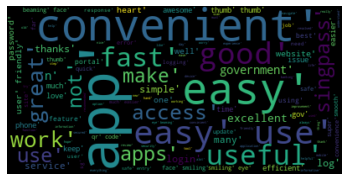

In [198]:
score5_words  = df_new[df_new['score']==5]
txt = " ".join(content for content in score5_words['content_processed'].astype(str))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

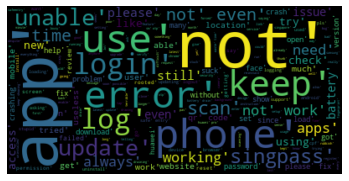

In [199]:
score1_words  = df_new[df_new['score']==1]
txt = " ".join(content for content in score1_words['content_processed'].astype(str))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# #spliting the training and testing data

In [200]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [201]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 50
max_length = 100
trunc_type='pre'
oov_tok = "<OOV>"

In [202]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [203]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [204]:
train_seqs = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

In [205]:
test_seqs = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seqs,maxlen=max_length, truncating=trunc_type)

In [206]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(X_train[1])
print(train_padded[1])
print(decode_review(train_padded[1]))
print(y_train[1])

failed to register countless times. reboot device, cleared cache but still failed midway thru.
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  276    2  175 1065  111 1480  141  853  727   23   72  276
 1481  865]
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? failed to register countless times reboot device cleared cache but still failed midway thru
[1 0 0 0 0]


In [207]:
train_labels = []
test_labels = []

In [208]:
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [209]:
train_padded = np.array(train_padded)
test_padded = np.array(test_padded)

In [210]:
print(len(train_padded))
print(len(test_padded))

1216
304


In [211]:
train_padded.shape

(1216, 100)

In [212]:
train_labels.shape

(1216, 5)

In [213]:
#using pre traing model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D, SimpleRNN

In [214]:
import os

glove_dir = r'C:\Users\Gayle\OneDrive\Documents\NP Data Analytics\Deep Learning\Week 11\Practical 6.html\Apr 2022\Week 11'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [215]:
#embedding_dim = 64

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < vocab_size:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [216]:
print(embedding_matrix)
print(len(embedding_matrix))
print(len(embedding_matrix[0]))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.68046999 -0.039263    0.30186    ... -0.073297   -0.064699
  -0.26043999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
10000
50


In [217]:
from tensorflow.keras.layers import LSTM

model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model3.add(LSTM(32, return_sequences=True))
model3.add(LSTM(32))
model3.add(Dense(5, activation='softmax'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 50)           500000    
                                                                 
 lstm_6 (LSTM)               (None, 100, 32)           10624     
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 519,109
Trainable params: 519,109
Non-trainable params: 0
_________________________________________________________________


In [218]:
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = False

In [219]:

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [220]:
history = model3.fit(train_padded, train_labels,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 5s 82ms/step - loss: 1.5333 - acc: 0.2891 - val_loss: 1.4859 - val_acc: 0.3361
Epoch 2/20
31/31 [==============================] - 2s 64ms/step - loss: 1.4431 - acc: 0.3323 - val_loss: 1.4764 - val_acc: 0.3033
Epoch 3/20
31/31 [==============================] - 2s 62ms/step - loss: 1.3966 - acc: 0.3621 - val_loss: 1.4157 - val_acc: 0.3402
Epoch 4/20
31/31 [==============================] - 2s 66ms/step - loss: 1.3582 - acc: 0.3817 - val_loss: 1.4193 - val_acc: 0.3689
Epoch 5/20
31/31 [==============================] - 2s 65ms/step - loss: 1.3406 - acc: 0.3817 - val_loss: 1.4431 - val_acc: 0.3402
Epoch 6/20
31/31 [==============================] - 2s 75ms/step - loss: 1.3208 - acc: 0.4187 - val_loss: 1.3895 - val_acc: 0.3607
Epoch 7/20
31/31 [==============================] - 2s 71ms/step - loss: 1.2968 - acc: 0.4033 - val_loss: 1.3691 - val_acc: 0.3320
Epoch 8/20
31/31 [==============================] - 2s 69ms/step - loss: 1.2814 - a

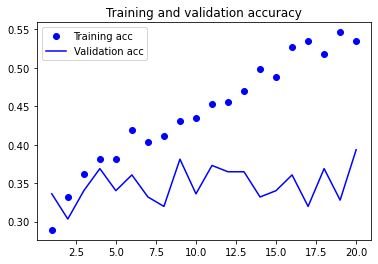

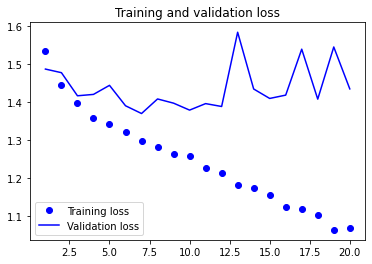

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 1.3 Data Sampling

## Step 2 – Develop a Sentiment Analysis Model

In [222]:
# Build the Model


In [223]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D, SimpleRNN, GRU


In [224]:
# Train the Model


In [225]:
#simple RNN model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(train_padded, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 50)           500000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 32)           2656      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
Total params: 504,901
Trainable params: 504,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 [==============================] - 2s 41ms/step - loss: 1.6201 - accuracy: 0.2181 - val_loss: 1.6102 - val_accuracy: 0.2623
Epoch 2/10
31/31 [=====================

In [226]:
# Plot the Training and Validation Accuracy & Loss Scores


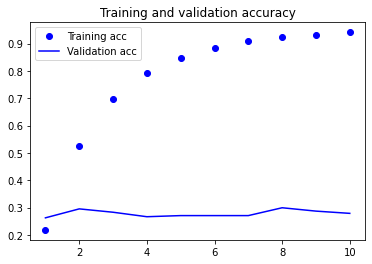

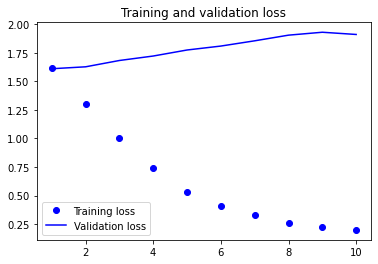

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [228]:
#simple LSTM model #base
#Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable 
#of learning order dependence in sequence prediction problems

from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 50)           500000    
                                                                 
 lstm_8 (LSTM)               (None, 100, 32)           10624     
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 519,109
Trainable params: 519,109
Non-trainable params: 0
_________________________________________________________________


In [229]:
history = model.fit(train_padded, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/10
31/31 [==============================] - 5s 83ms/step - loss: 1.5948 - acc: 0.2531 - val_loss: 1.5705 - val_acc: 0.2664
Epoch 2/10
31/31 [==============================] - 2s 68ms/step - loss: 1.5401 - acc: 0.2840 - val_loss: 1.5305 - val_acc: 0.2992
Epoch 3/10
31/31 [==============================] - 2s 69ms/step - loss: 1.4744 - acc: 0.3148 - val_loss: 1.4799 - val_acc: 0.3361
Epoch 4/10
31/31 [==============================] - 2s 65ms/step - loss: 1.3733 - acc: 0.4136 - val_loss: 1.4251 - val_acc: 0.3484
Epoch 5/10
31/31 [==============================] - 2s 67ms/step - loss: 1.2604 - acc: 0.4660 - val_loss: 1.4389 - val_acc: 0.3074
Epoch 6/10
31/31 [==============================] - 2s 68ms/step - loss: 1.1518 - acc: 0.5340 - val_loss: 1.4448 - val_acc: 0.3197
Epoch 7/10
31/31 [==============================] - 2s 78ms/step - loss: 1.0391 - acc: 0.5730 - val_loss: 1.4832 - val_acc: 0.3525
Epoch 8/10
31/31 [==============================] - 2s 72ms/step - loss: 0.9571 - a

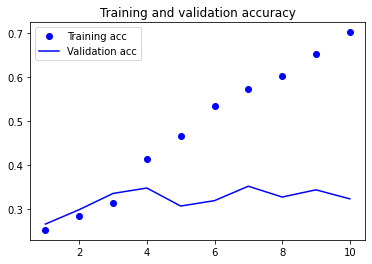

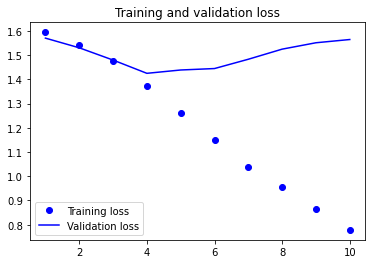

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [231]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(32, return_sequences=True))
model.add(SpatialDropout1D(0.7))
model.add(Dense(16, activation='relu'))
model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 50)           500000    
                                                                 
 lstm_10 (LSTM)              (None, 100, 32)           10624     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 32)          0         
 lDropout1D)                                                     
                                                                 
 dense_10 (Dense)            (None, 100, 16)           528       
                                                                 
 lstm_11 (LSTM)              (None, 32)                6272      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                      

In [232]:
history = model.fit(train_padded, train_labels,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
31/31 [==============================] - 10s 156ms/step - loss: 1.6009 - acc: 0.2377 - val_loss: 1.5718 - val_acc: 0.2705
Epoch 2/15
31/31 [==============================] - 4s 130ms/step - loss: 1.5697 - acc: 0.2819 - val_loss: 1.5399 - val_acc: 0.2746
Epoch 3/15
31/31 [==============================] - 4s 128ms/step - loss: 1.5128 - acc: 0.2994 - val_loss: 1.5273 - val_acc: 0.3033
Epoch 4/15
31/31 [==============================] - 4s 132ms/step - loss: 1.4677 - acc: 0.3210 - val_loss: 1.4491 - val_acc: 0.3156
Epoch 5/15
31/31 [==============================] - 4s 131ms/step - loss: 1.3708 - acc: 0.3611 - val_loss: 1.5015 - val_acc: 0.3279
Epoch 6/15
31/31 [==============================] - 4s 126ms/step - loss: 1.2993 - acc: 0.3755 - val_loss: 1.3807 - val_acc: 0.3033
Epoch 7/15
31/31 [==============================] - 4s 129ms/step - loss: 1.2335 - acc: 0.4043 - val_loss: 1.3859 - val_acc: 0.3197
Epoch 8/15
31/31 [==============================] - 4s 119ms/step - loss: 1

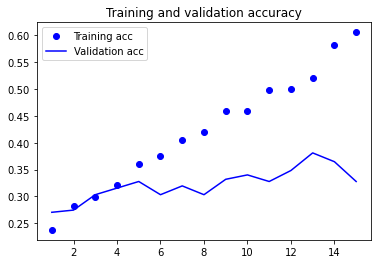

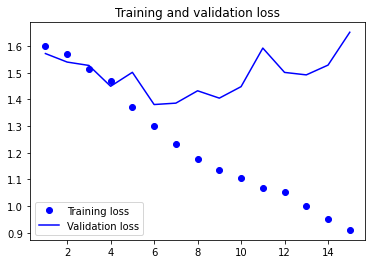

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [234]:
# Save the Model
model.save('singpass_model_1_1.h5')

### Model #1 

### Model #2 

In [235]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model2.add(GRU(32,return_sequences=True))
model2.add(GRU(32))
model2.add(Dense(5, activation='softmax'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 50)           500000    
                                                                 
 gru_6 (GRU)                 (None, 100, 32)           8064      
                                                                 
 gru_7 (GRU)                 (None, 32)                6336      
                                                                 
 dense_12 (Dense)            (None, 5)                 165       
                                                                 
Total params: 514,565
Trainable params: 514,565
Non-trainable params: 0
_________________________________________________________________


In [236]:
history = model2.fit(train_padded, train_labels,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
31/31 [==============================] - 6s 102ms/step - loss: 1.5909 - acc: 0.2325 - val_loss: 1.5318 - val_acc: 0.2705
Epoch 2/15
31/31 [==============================] - 3s 84ms/step - loss: 1.4704 - acc: 0.3179 - val_loss: 1.4590 - val_acc: 0.3238
Epoch 3/15
31/31 [==============================] - 2s 79ms/step - loss: 1.3257 - acc: 0.3837 - val_loss: 1.3937 - val_acc: 0.3238
Epoch 4/15
31/31 [==============================] - 2s 80ms/step - loss: 1.2071 - acc: 0.4599 - val_loss: 1.4146 - val_acc: 0.3156
Epoch 5/15
31/31 [==============================] - 3s 84ms/step - loss: 1.1151 - acc: 0.5350 - val_loss: 1.3794 - val_acc: 0.3566
Epoch 6/15
31/31 [==============================] - 2s 80ms/step - loss: 1.0151 - acc: 0.5669 - val_loss: 1.4086 - val_acc: 0.3443
Epoch 7/15
31/31 [==============================] - 3s 82ms/step - loss: 0.9225 - acc: 0.6461 - val_loss: 1.4405 - val_acc: 0.3279
Epoch 8/15
31/31 [==============================] - 3s 82ms/step - loss: 0.8280 - 

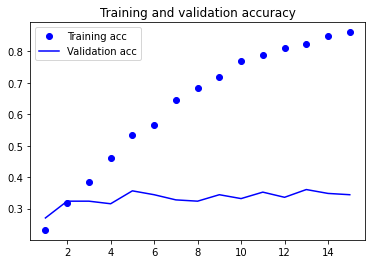

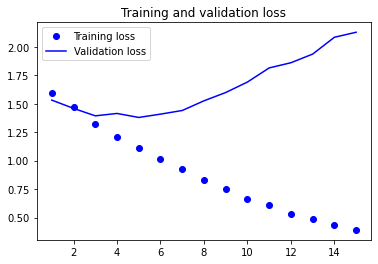

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [238]:
# Build the Model

# Task 1: Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model2.add(GRU(32,return_sequences=True))
model2.add(GRU(32,return_sequences=True))
model2.add(GRU(32,
               dropout = 0.2,
               recurrent_dropout = 0.2,
               return_sequences=True))
model2.add(GRU(32,dropout = 0.2,recurrent_dropout = 0.2))
model2.add(Dense(5, activation='softmax'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 50)           500000    
                                                                 
 gru_8 (GRU)                 (None, 100, 32)           8064      
                                                                 
 gru_9 (GRU)                 (None, 100, 32)           6336      
                                                                 
 gru_10 (GRU)                (None, 100, 32)           6336      
                                                                 
 gru_11 (GRU)                (None, 32)                6336      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 527,237
Trainable params: 527,237
Non-t

In [239]:
# Train the Model
history = model2.fit(train_padded, train_labels,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
31/31 [==============================] - 16s 273ms/step - loss: 1.5783 - acc: 0.2479 - val_loss: 1.5411 - val_acc: 0.2869
Epoch 2/15
31/31 [==============================] - 7s 216ms/step - loss: 1.4609 - acc: 0.3241 - val_loss: 1.4856 - val_acc: 0.2828
Epoch 3/15
31/31 [==============================] - 7s 214ms/step - loss: 1.3210 - acc: 0.3837 - val_loss: 1.4500 - val_acc: 0.3238
Epoch 4/15
31/31 [==============================] - 7s 215ms/step - loss: 1.2299 - acc: 0.4084 - val_loss: 1.4942 - val_acc: 0.2951
Epoch 5/15
31/31 [==============================] - 7s 214ms/step - loss: 1.1380 - acc: 0.4424 - val_loss: 1.4975 - val_acc: 0.3238
Epoch 6/15
31/31 [==============================] - 6s 210ms/step - loss: 1.0590 - acc: 0.5144 - val_loss: 1.4894 - val_acc: 0.3156
Epoch 7/15
31/31 [==============================] - 7s 224ms/step - loss: 0.9839 - acc: 0.5679 - val_loss: 1.5852 - val_acc: 0.3238
Epoch 8/15
31/31 [==============================] - 6s 200ms/step - loss: 0

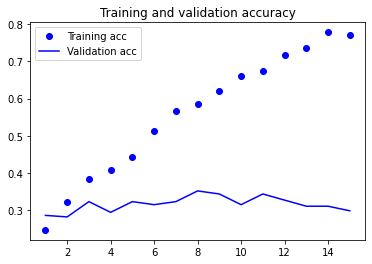

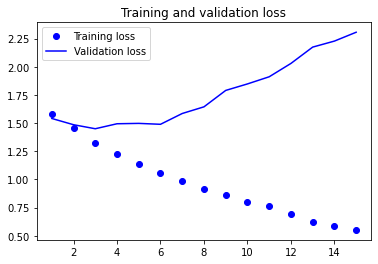

In [240]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [241]:
# Save the Model
model2.save('singpass_model_2_2.h5')

In [242]:
#model 4

In [243]:
from tensorflow import keras


In [244]:
# Model #1 (replicate where necessary for other models)
model1 = keras.models.load_model('singp_model_1_1.h5')

print("Evaluate on test data")
results = model1.evaluate(test_padded, test_labels, batch_size=32)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model1.predict(test_padded[:3])
print("predictions shape:", predictions.shape)
print(decode_review(test_padded[0]))
print(decode_review(test_padded[1]))
print(decode_review(test_padded[2]))
print(test_padded[:3])
print(test_labels[:3])
print(predictions)

OSError: No file or directory found at singp_model_1_1.h5

In [ ]:
# Model #2 (replicate where necessary for other models)
model2 = keras.models.load_model('singpass_model_2_2.h5')

print("Evaluate on test data")
results = model2.evaluate(test_padded, test_labels, batch_size=32)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model2.predict(test_padded[:3])
print("predictions shape:", predictions.shape)
print(decode_review(test_padded[0]))
print(decode_review(test_padded[1]))
print(decode_review(test_padded[2]))
print(test_padded[:3])
print(test_labels[:3])
print(predictions)

In [ ]:
# Save the Best Model
model1.save('singpass_model_best_1.h5')

In [ ]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D, SimpleRNN, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import numpy as np
import pandas as pd

In [ ]:
best_model = keras.models.load_model('singpass_model_best_1.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor
text_seqs = tokenizer.texts_to_sequences(text_input)
text_padded = pad_sequences(text_seqs,maxlen=max_length, truncating=trunc_type)

In [ ]:
text_padded =np.array(text_padded)

In [ ]:
# show the model output using predict function
predictions = best_model.predict(text_padded)

In [ ]:
predictions

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor
text_seqs = tokenizer.texts_to_sequences(text_input)
text_padded = pad_sequences(text_seqs,maxlen=max_length, truncating=trunc_type)

In [ ]:
text_padded =np.array(text_padded)

In [ ]:
# show the model output using predict function
predictions = best_model.predict(text_padded)

In [ ]:
predictions

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor
text_seqs = tokenizer.texts_to_sequences(text_input)
text_padded = pad_sequences(text_seqs,maxlen=max_length, truncating=trunc_type)

In [ ]:
text_padded =np.array(text_padded)

In [ ]:
# show the model output using predict function
predictions = best_model.predict(text_padded)

In [ ]:
predictions

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor
text_seqs = tokenizer.texts_to_sequences(text_input)
text_padded = pad_sequences(text_seqs,maxlen=max_length, truncating=trunc_type)
text_padded =np.array(text_padded)
# show the model output using predict function
predictions = best_model.predict(text_padded)
predictions